# AML INDIVIDUAL ASSIGNMENT

__NAME__       :   CHEAH WENG HOE 

__TP NUMBER__  :   TP055533 

__TITLE__      :   PREDICTING ANALYTICS FOR REAL ESTATE: A COMPREHENSIVE APPROACH TO HOUSE PRICE FORECASTING

## STEP 1: INSTALLING REQUIRED LIBRARIES

In [ ]:
# Installing required libraries (if necessary)
pip install pandas seaborn xgboost mlxtend 

In [ ]:
# View all the libraries in the kernel
!pip list

## STEP 2: IMPORTING REQUIRED LIBRARIES

In [1]:
# ESSENTIALS
import pandas as pd
import numpy as np
import gc

# PLOTS
import seaborn as sns
import matplotlib.pyplot as plt

# STATS
import scipy.stats as st
from scipy.stats import johnsonsu, skew, boxcox_normmax, norm, uniform
from scipy.special import boxcox1p

# MODELS
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from xgboost import XGBRegressor

# MISC
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, StratifiedKFold, RepeatedKFold 
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# IGNORE WARNING WHILE CODE IS EXECUTED
import warnings
warnings.filterwarnings("ignore")

In [2]:
# CUSTOMISING 
# COLOR PALETTES
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

# DISPLAY ALL COLUMNS
pd.set_option('display.max_columns', None)

# DISPLAY ALL ROWS
pd.set_option('display.max_rows', None)

## STEP 3: LOADING DATASET

In [3]:
# IMPORTING TRAINING DATASET
house = pd.read_csv('./dataset/train.csv')

# IMPORTING TEST DATASET
house_test = pd.read_csv('./dataset/test.csv')

In [4]:
# VIEW THE TOTLA ROWS AND COLUMNS
house.shape, house_test.shape 

((1460, 81), (1459, 80))

In [5]:
# VIEW THE FIRST 5 ROWS
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
# DESCRIPTION OF THE DATASET
house.describe().T.style.bar(subset = ['mean'], color = colors[3]).background_gradient(subset = ['std', '50%', 'max'])

In [7]:
# VIEW THE COLUMNS OF THE DATASET
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# CHECKING DATA TYPE
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### OVERVIEW

## STEP 4: EXPLORATORY DATA ANALYSIS

### 1. DISTRIBUTION

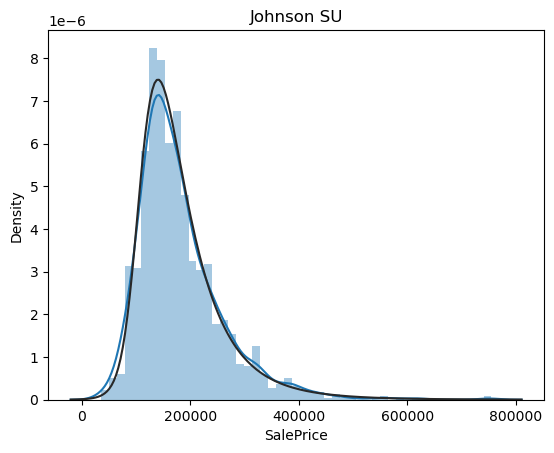

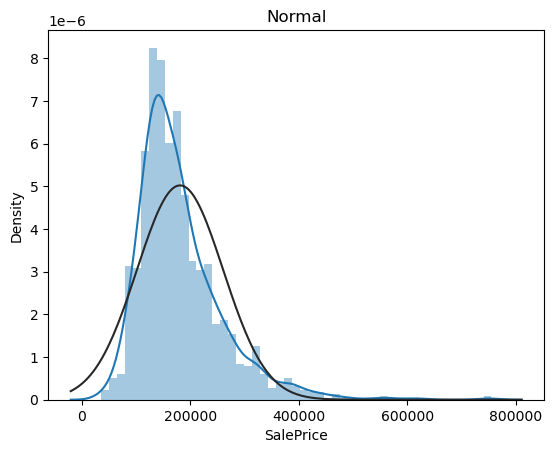

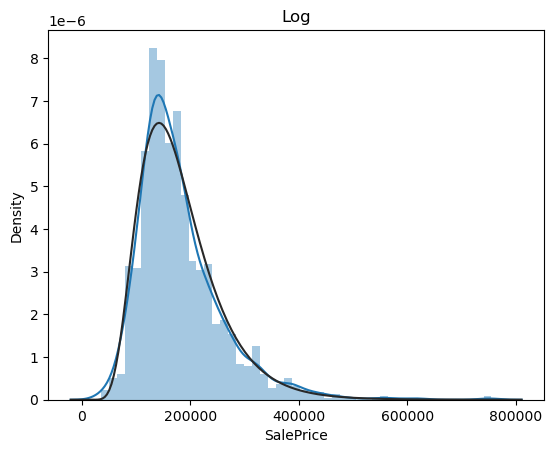

In [9]:
# CHECKING THE DISTRIBUTION OF TARGET VARIABLE (SalePrice)
y = house['SalePrice']

# USING JOHNSON DISTRIBUTION
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.johnsonsu)
plt.show()

# USING NORMAL DISTRIBUTION
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm)
plt.show()

# USING LOG DISTRIBUTION
plt.figure(3); plt.title('Log')
sns.distplot(y, kde=True, fit=st.lognorm)
plt.show()

In [10]:
# SKEW AND KURT
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 2. UNIVARIATE ANALYSIS

In [11]:
# FINDING NUMERIC FEATURES
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in house.columns:
    if house[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms', 'Total_porch_sf', 'haspool', 'hasgarage', 'hasbsmt', 'hasfireplace']:
            pass
        else:
            numeric.append(i)

# VISUALISATION
num_features = len(numeric)
fig, axs = plt.subplots(ncols=2, nrows=(num_features // 2) + (num_features % 2), figsize=(12, num_features * 3))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)

for i, feature in enumerate(numeric, 1):
    plt.subplot((num_features // 2) + (num_features % 2), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=house)
        
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

### 3. CHECKING FOR CORRELATION

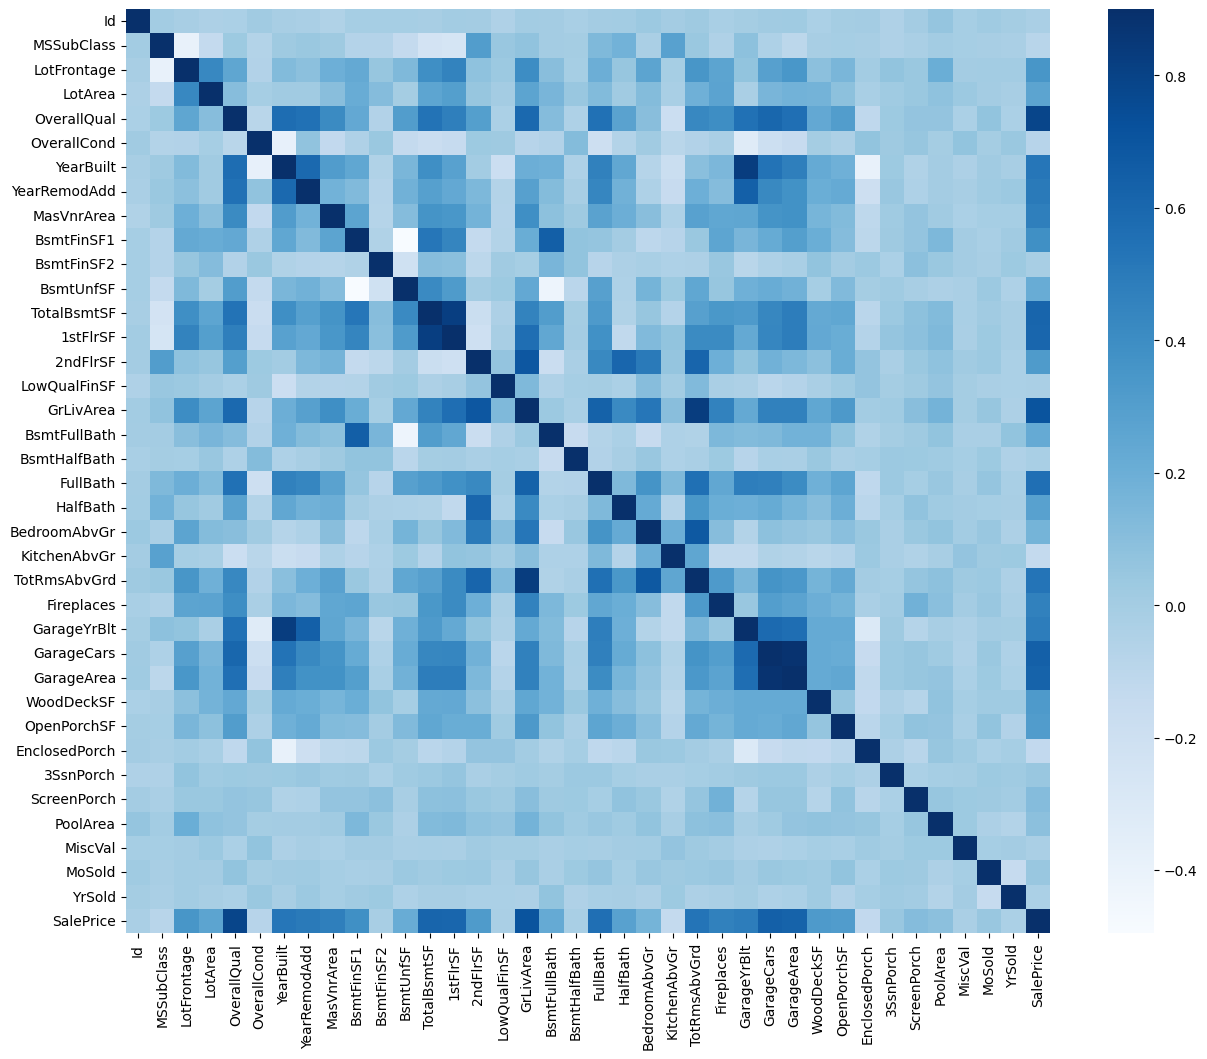

In [12]:
# SELECT ONLY NUMERIC COLUMNS
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = house.select_dtypes(include=numeric_dtypes)

# CORRELATION MATRIX
corr = numeric_cols.corr()

# PLOTTING HEATMAP
plt.figure(figsize=(15, 12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=False)
plt.show()

### 4. VISUALISING SALES PRICE VS OVERALL QUAL

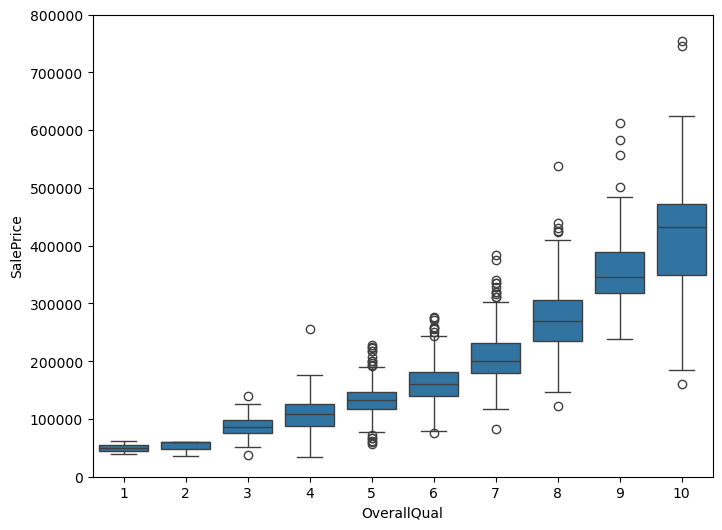

In [13]:
# VISUALISATION FOR SALES PRICE VS OVERALL QUAL
data = pd.concat([house['SalePrice'], house['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=house['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 5. VISUALISING SALES PRICR VS YEAR BUILT

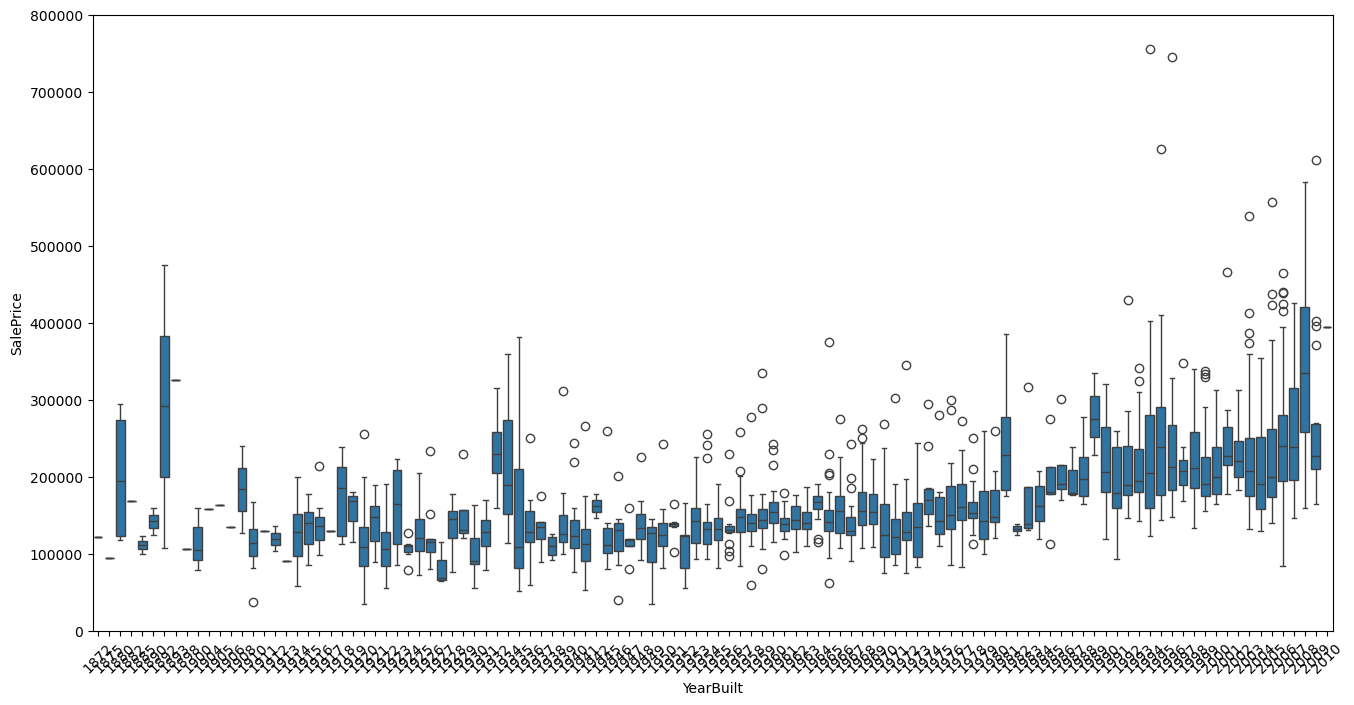

In [14]:
# VISUALISATION FOR SALES PRICR VS YEAR BUILT
data = pd.concat([house['SalePrice'], house['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=house['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

### 6. VISUALISING SALES PRICE VS TOTAL BSMTSF

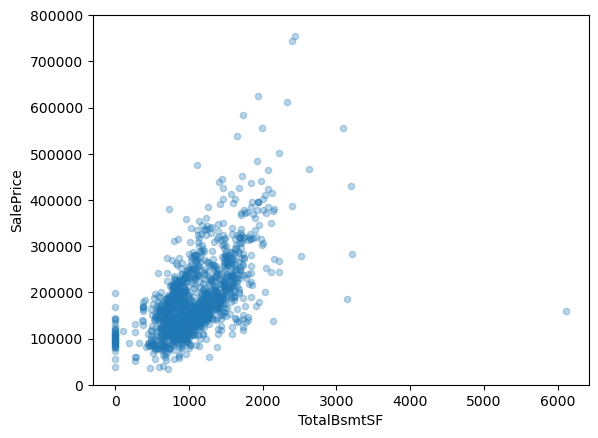

In [15]:
# VISUALISATION SALES PRICE VS TOTAL BSMTSF
data = pd.concat([house['SalePrice'], house['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000));

### 7. VISUALISING SALES PRICE VS LOT AREA

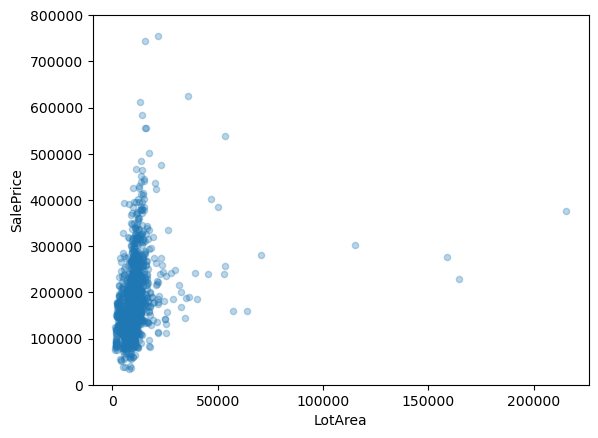

In [16]:
# VISUALISATION SALES PRICE VS LOT AREA
data = pd.concat([house['SalePrice'], house['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

### 8. VISUALISING SALES PRICE VS GRLIVAREA

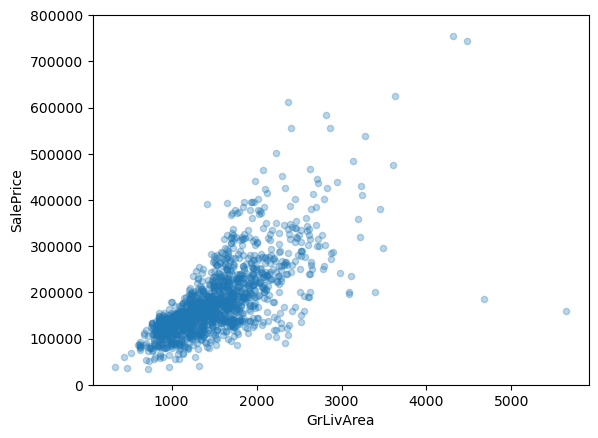

In [17]:
# VISUALISATION SALES PRICE VS GRLIVAREA
data = pd.concat([house['SalePrice'], house['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

In [18]:
# REMOVING ID FROM TRAIN AND TEST SET
train_ID = house['Id']
test_ID = house_test['Id']
house.drop(['Id'], axis=1, inplace=True)
house_test.drop(['Id'], axis=1, inplace=True)

house.shape, house_test.shape

((1460, 80), (1459, 79))

## STEP 4: FEATURE ENGINEERING

### 1. LOG DISTRIBUTION

In [19]:
# LOG TRANSFORM
house["SalePrice"] = np.log1p(house["SalePrice"])


 mu = 12.02 and sigma = 0.40



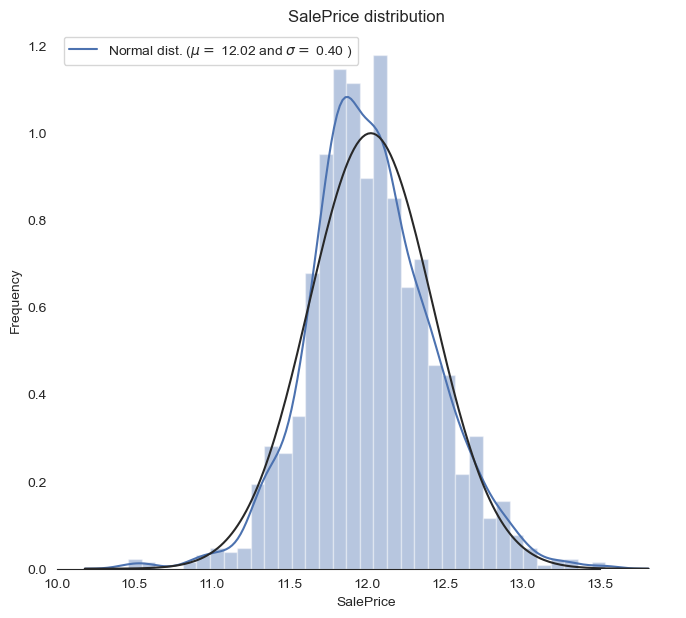

In [20]:
# PLOTTING LOG TRANSFORM DATA
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(house['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

### 2. REMOVING OUTLIERS

In [ ]:
# Removing outliers using IQR
# List of numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = [col for col in house.columns if house[col].dtype in numeric_dtypes]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric feature
Q1 = house[numeric_features].quantile(0.25)
Q3 = house[numeric_features].quantile(0.75)

# Calculate IQR for each numeric feature
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Function to remove outliers based on IQR
def remove_outliers(df, lower_bound, upper_bound):
    for col in numeric_features:
        df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]
    return df

# Remove outliers
house_cleaned = remove_outliers(house, lower_bound, upper_bound)

# Reset index after removing outliers
house_cleaned.reset_index(drop=True, inplace=True)

# Check the shape of the cleaned dataset
print("Original shape:", house.shape)
print("Cleaned shape:", house_cleaned.shape)

In [21]:
# REMOVING OUTLIERS MANUALLY
house.drop(house[(house['OverallQual']<5) & (house['SalePrice']>200000)].index, inplace=True)
house.drop(house[(house['GrLivArea']>4500) & (house['SalePrice']<300000)].index, inplace=True)
house.reset_index(drop=True, inplace=True)

house.shape

(1458, 80)

### 3. SPLITTING X AND Y

In [22]:
# SPLITTING FEATURES AND TARGET VARIABLE
train_labels = house['SalePrice'].reset_index(drop=True)
train_features = house.drop(['SalePrice'], axis=1)
test_features = house_test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2917, 79)

### 4. HANDLING MISSING VALUES

In [23]:
# CREATE FUNCTION TO CHECK MISSING VALUES
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

# CHECKING MISSING VALUES
missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('PoolQC', 99.69),
 ('MiscFeature', 96.4),
 ('Alley', 93.21),
 ('Fence', 80.43),
 ('MasVnrType', 60.54),
 ('FireplaceQu', 48.68),
 ('LotFrontage', 16.66),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45)]

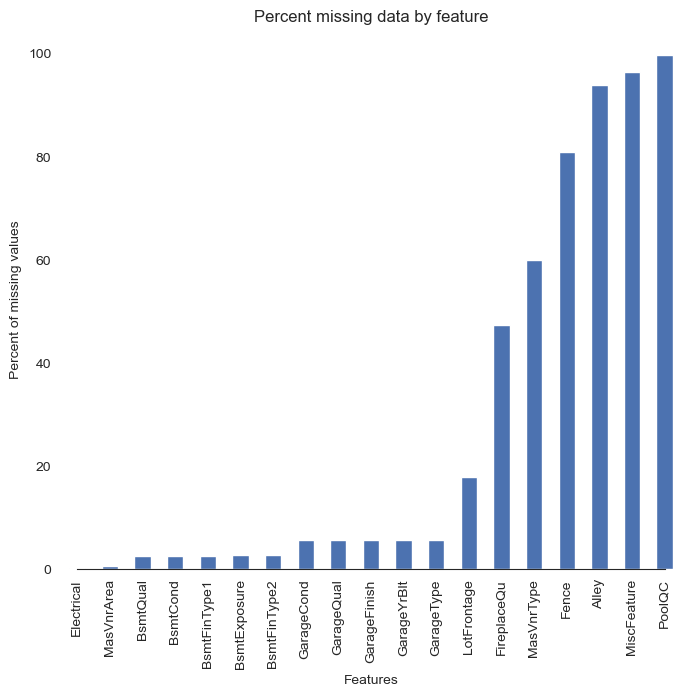

In [24]:
# VISUALISE MISSING VALUES
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(house.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# CUSTOMISATION
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [25]:
# CONVERT NON-NUMERIC FEATURES FROM NUMBERS TO STRING 
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

In [26]:
# CREATE FUNCTION TO IMPUTE MISSING VALUES
def handle_missing(features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # the data description stats that NA refers to "No Pool"
    features["PoolQC"] = features["PoolQC"].fillna("None")
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    # Group by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # impute remaining categorical variables as None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # impute remaining numeric values as 0
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

all_features = handle_missing(all_features)

In [27]:
# CHECK FOR MISSING VALUES AFTER IMPUTATION
missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0)]

### 5. CHECKING FOR DUPLICATE DATA

In [28]:
# CHECK FOR DUPLICATE ROWS
house.loc[house.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### 6. FIX SKEWED FEATURES

In [29]:
# IDENTIFY NUMERIC FEATURES
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

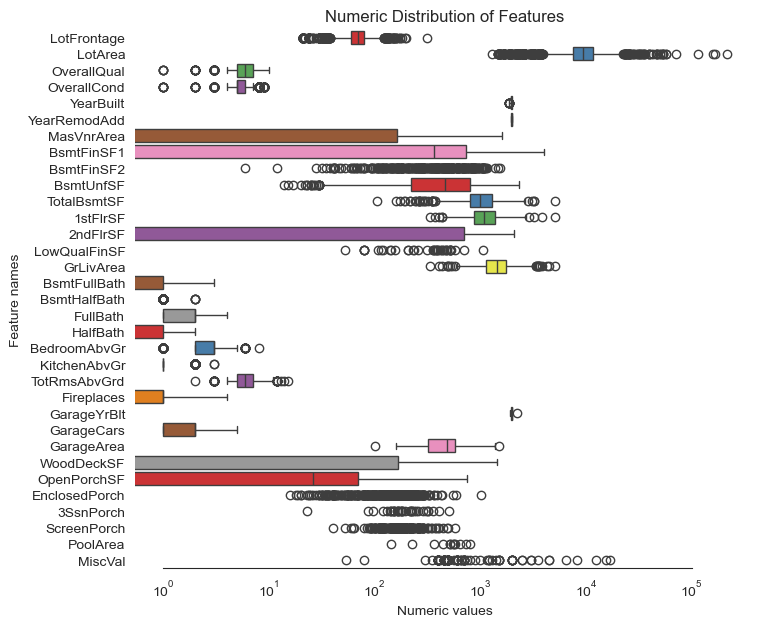

In [30]:
# CREATE BOXPLOT FOR ALL NUMERIC FEATURES
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [31]:
# Find skewed numerical features
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
dtype: float64

In [32]:
# INITIALISE POWER TRANSFORM
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# NORMALISED SKEWED FEATURES
all_features[skew_index] = pt.fit_transform(all_features[skew_index])

# CHECK THE TRANSFORMED RESULT
print(all_features[skew_index].head())

   MiscVal  PoolArea    LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0     -0.0      -0.0  17.941175          -0.0       -0.0      0.427656   
1     -0.0      -0.0  18.387385          -0.0       -0.0      0.427656   
2     -0.0      -0.0  18.953064          -0.0       -0.0      0.427656   
3     -0.0      -0.0  18.368969          -0.0       -0.0      0.427656   
4     -0.0      -0.0  19.822022          -0.0       -0.0      0.427656   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0        -0.0      -0.000000         -0.0      -0.00000    2.854908   
1        -0.0      -0.000000         -0.0       0.04214   -0.000000   
2        -0.0      -0.000000         -0.0      -0.00000    2.806492   
3        -0.0       0.769325         -0.0      -0.00000   -0.000000   
4        -0.0      -0.000000         -0.0      -0.00000    2.988466   

   OpenPorchSF  WoodDeckSF  1stFlrSF  LotFrontage  GrLivArea  BsmtFinSF1  \
0     4.307414   -0.000000  6.092297    20.767314   

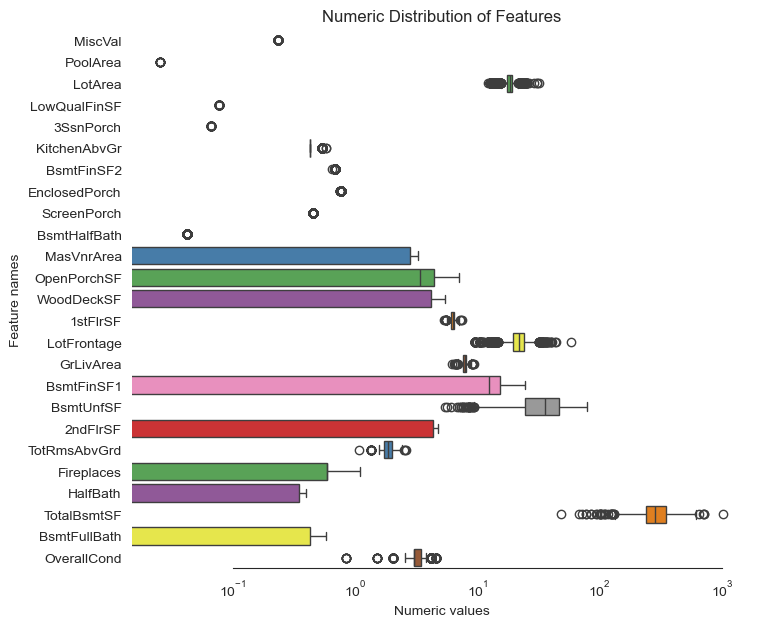

In [33]:
# CHECK FOR SKEWED FEATURES AFTER TRANSFORMATION
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

## 7. CREATING NEW FEATURES

In [34]:
# FEATURE CREATION
# References: https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition/notebook
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1
all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                 all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['GarageCars'] = all_features['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
all_features['LotFrontage'] = all_features['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
all_features['MasVnrArea'] = all_features['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## 8. FEATURE TRANSFORMATIONS

In [35]:
# CREATE FUNCTION FOR LOG TRANSFORMATION
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

all_features = logs(all_features, log_features)

In [36]:
# CREATE FUNCTION FOR SQUARED TRANSFORMATION
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
                    'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
                    'GarageCars_log', 'GarageArea_log']
all_features = squares(all_features, squared_features)

## 9. ENCODING CATEGORICAL VARIABLES

#### GET DUMMIES

In [ ]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

In [ ]:
all_features.head()

In [ ]:
# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]

#### ONEHOTENCODER

In [37]:
# IDENTIFY CATEGORICAL FEATURES
categorical_features = all_features.select_dtypes(include=['object']).columns.tolist()

# Create ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply the transformation to the all_features dataframe
all_features_encoded = preprocessor.fit_transform(all_features)

# Convert the transformed array back to a dataframe
# Get feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_feature_names) + [col for col in all_features.columns if col not in categorical_features]
all_features_encoded = pd.DataFrame(all_features_encoded, columns=all_feature_names)

# Verify the transformation
print(all_features_encoded.shape)
print(all_features_encoded.head())

(2917, 379)
   MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0             0.0            0.0            0.0            0.0            0.0   
1             0.0            1.0            0.0            0.0            0.0   
2             0.0            0.0            0.0            0.0            0.0   
3             0.0            0.0            0.0            0.0            0.0   
4             0.0            0.0            0.0            0.0            0.0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0     

## 10. RECREATE TRAINING AND TEST SETS

In [38]:
# INSERT NEW FEATURES INTO THE DATASET
X = all_features_encoded.iloc[:len(train_labels), :]
X_test = all_features_encoded.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1458, 379), (1458,), (1459, 379))

In [39]:
# SPLITTING DATASET TO TRAIN AND TEST SET
X_train, X_test, train_labels_train, train_labels_test = train_test_split(X, train_labels, test_size=0.2, random_state=42)

print(X_train.shape, train_labels_train.shape)  # Check the shape of the training set
print(X_test.shape, train_labels_test.shape)    # Check the shape of the testing set

(1166, 379) (1166,)
(292, 379) (292,)


## STEP 5 MODEL IMPLEMENTATION

### 1. IMPLEMENTING MODELS

In [40]:
# Define the pipeline with RobustScaler and Ridge
ridge_pipeline = make_pipeline(RobustScaler(), Ridge())

In [41]:
# Support Vector Regressor
svr_pipeline = make_pipeline(RobustScaler(), SVR())

In [42]:
# Create XGBRegressor object
xgb = XGBRegressor()

### 1. CROSS VALIDATION

In [43]:
# K-FOLD
kf = KFold(n_splits=10, random_state=15, shuffle=True)

In [44]:
# REPEATED KFOLD
rkf = RepeatedKFold(n_splits=10, random_state=15, n_repeats=5)

In [45]:
# SHUFFLE SPLIT
shuffle = ShuffleSplit(n_splits=10, random_state=15, test_size=0.2)

### 2. EVALUATION METRICS

In [46]:
# CREATE FUNCTION FOR RMSE
def cv_rmse(model, X=X, y=train_labels):
    rmse_kf = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    rmse_rkf = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=rkf))
    rmse_shuffle = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=shuffle))
    return (rmse_kf, rmse_rkf, rmse_shuffle)

# CREATE FUNCTION FOR R-SQUARED
def cv_r2(model, X=X, y=train_labels):
    r2_kf = cross_val_score(model, X, train_labels, scoring="r2", cv=kf)
    r2_rkf = cross_val_score(model, X, train_labels, scoring="r2", cv=rkf)
    r2_shuffle = cross_val_score(model, X, train_labels, scoring="r2", cv=shuffle)
    return (r2_kf, r2_rkf, r2_shuffle)

In [47]:
# Creating function to train and evaluate models
def evaluate_model(model, name):
    score_rmse = cv_rmse(model, X_array, train_labels_array)
    score_r2 = cv_r2(model, X_array, train_labels_array)

    # Print RMSE scores
    print(f"{name} RMSE Scores:")
    print("KFold: {:.4f} +/- {:.4f}".format(score_rmse[0].mean(), score_rmse[0].std()))
    print("RepeatedKFold: {:.4f} +/- {:.4f}".format(score_rmse[1].mean(), score_rmse[1].std()))
    print("ShuffleSplit: {:.4f} +/- {:.4f}".format(score_rmse[2].mean(), score_rmse[2].std()))

    # Print R^2 scores
    print(f"\n{name} R^2 Scores:")
    print("KFold: {:.4f} +/- {:.4f}".format(score_r2[0].mean(), score_r2[0].std()))
    print("RepeatedKFold: {:.4f} +/- {:.4f}".format(score_r2[1].mean(), score_r2[1].std()))
    print("ShuffleSplit: {:.4f} +/- {:.4f}".format(score_r2[2].mean(), score_r2[2].std()))

    return score_rmse, score_r2

In [49]:
# CONVERT X AND TRAIN_LABEL TO NUMPY ARRAY
X_array = X.values
train_labels_array = train_labels.values

In [50]:
# Selecting the best cross-validation for each model
scores_rmse = {}
scores_r2 = {}

scores_rmse['ridge'], scores_r2['ridge'] = evaluate_model(ridge_pipeline, "Ridge")
print("-----------------------------------------------------------------------------")
scores_rmse['svr'], scores_r2['svr'] = evaluate_model(svr_pipeline, "SVR")
print("-----------------------------------------------------------------------------")
scores_rmse['xgb'], scores_r2['xgb'] = evaluate_model(xgb, "XGBoost") 

Ridge RMSE Scores:
KFold: 0.1125 +/- 0.0130
RepeatedKFold: 0.1135 +/- 0.0135
ShuffleSplit: 0.1140 +/- 0.0071

Ridge R^2 Scores:
KFold: 0.9193 +/- 0.0137
RepeatedKFold: 0.9175 +/- 0.0170
ShuffleSplit: 0.9164 +/- 0.0119
-----------------------------------------------------------------------------
SVR RMSE Scores:
KFold: 0.1195 +/- 0.0161
RepeatedKFold: 0.1191 +/- 0.0150
ShuffleSplit: 0.1214 +/- 0.0094

SVR R^2 Scores:
KFold: 0.9083 +/- 0.0203
RepeatedKFold: 0.9092 +/- 0.0192
ShuffleSplit: 0.9052 +/- 0.0148
-----------------------------------------------------------------------------
XGBoost RMSE Scores:
KFold: 0.1303 +/- 0.0158
RepeatedKFold: 0.1352 +/- 0.0146
ShuffleSplit: 0.1350 +/- 0.0129

XGBoost R^2 Scores:
KFold: 0.8921 +/- 0.0173
RepeatedKFold: 0.8830 +/- 0.0225
ShuffleSplit: 0.8831 +/- 0.0184


### 3. HYPERPARAMETER TUNING

#### Model 1 : Ridge Regression

In [51]:
# Model 1 :  Parameters
ridge_parms = dict()
ridge_parms['ridge__alpha'] = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]

In [52]:
# Perform GridSearchCV usng K-Fold
ridge_grid_search = GridSearchCV(estimator=ridge_pipeline,
                                 param_grid=ridge_parms,
                                 scoring='neg_mean_squared_error',
                                 cv=kf,
                                 verbose=1,
                                 n_jobs=-1)

# Fit the grid search
ridge_grid_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for Ridge Regressor:", ridge_grid_search.best_params_)
print("Best RMSE score found for Ridge Regressor:", np.sqrt(-ridge_grid_search.best_score_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters found for Ridge Regressor: {'ridge__alpha': 10}
Best RMSE score found for Ridge Regressor: 0.11093105199691933


In [53]:
# Perform RandomSearch using K-Fold
ridge_random_search = RandomizedSearchCV(estimator=ridge_pipeline,
                                         param_distributions=ridge_parms,
                                         n_iter=100,  # number of random samples
                                         scoring='neg_mean_squared_error',
                                         cv=kf,
                                         verbose=1,
                                         random_state=42,
                                         n_jobs=-1)

# Fit the random search
ridge_random_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for Ridge Regressor:", ridge_random_search.best_params_)
print("Best RMSE score found for Ridge Regressor:", np.sqrt(-ridge_random_search.best_score_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters found for Ridge Regressor: {'ridge__alpha': 10}
Best RMSE score found for Ridge Regressor: 0.11093105199691933


#### MODEL 2 : SVR

In [54]:
# Model 2 : Parameters
svr_parms = dict()
svr_parms['svr__C'] = [10, 20, 30]                             # Regularization parameter
svr_parms['svr__epsilon'] = [0.008, 0.01, 0.02]                # Epsilon parameter
# svr_parms['svr__kernel'] = ['linear', 'rbf', 'sigmoid']      # Kernel type
svr_parms['svr__gamma'] = [0.0001, 0.0003, 0.001]              # Kernel coefficient

In [56]:
# Perform GridSearchCV using Repeated K-Fold
svr_grid_search = GridSearchCV(estimator=svr_pipeline,
                               param_grid=svr_parms,
                               scoring='neg_mean_squared_error',
                               cv=rkf,
                               verbose=1,
                               n_jobs=-1)

# Fit the grid search
svr_grid_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for SVR:", svr_grid_search.best_params_)
print("Best RMSE score found for SVR:", np.sqrt(-svr_grid_search.best_score_))

Fitting 50 folds for each of 27 candidates, totalling 1350 fits
Best parameters found for SVR: {'svr__C': 30, 'svr__epsilon': 0.02, 'svr__gamma': 0.0003}
Best RMSE score found for SVR: 0.10926127968032051


#### Model 2 : Random Search

In [58]:
# Perform RandomSearch using Repeated K-Fold
svr_random_search = RandomizedSearchCV(estimator=svr_pipeline,
                                         param_distributions=svr_parms,
                                         n_iter=100,  # number of random samples
                                         scoring='neg_mean_squared_error',
                                         cv=rkf,
                                         verbose=1,
                                         random_state=42,
                                         n_jobs=-1)

# Fit the random search
svr_random_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for SVR:", svr_random_search.best_params_)
print("Best RMSE score found for SVR:", np.sqrt(-svr_random_search.best_score_))

Fitting 50 folds for each of 27 candidates, totalling 1350 fits
Best parameters found for SVR: {'svr__gamma': 0.0003, 'svr__epsilon': 0.02, 'svr__C': 30}
Best RMSE score found for SVR: 0.10926127968032051


#### MODEL 3 : XGBoost

In [64]:
# Model 3 : Parameters
xgb_parms = dict()
xgb_parms['learning_rate'] = [0.01, 0.1, 0.2]
# xgb_parms['n_estimators'] = [1000, 2000, 3000]      # Number of boosting rounds
xgb_parms['max_depth'] = [3, 4, 5]                  # Maximum depth of a tree
xgb_parms['min_child_weight'] = [1, 3, 5]           # Minimum sum of instance weight needed in a child
xgb_parms['gamma'] = [0.0, 0.1, 0.2]                # Minimum loss reduction required to make a further partition
xgb_parms['subsample'] = [0.6, 0.7, 0.8]            # Subsample ratio of the training instance
# xgb_parms['colsample_bytree'] = [0.6, 0.7, 0.8]     # Subsample ratio of columns when constructing each tree
# xgb_parms['reg_alpha'] = [0.00001, 0.0001, 0.001]   # L1 regularization term on weights

In [65]:
# Perform GridSearchCV using K-Fold
xgb_grid_search = GridSearchCV(estimator=xgb,
                               param_grid=xgb_parms,
                               scoring='neg_mean_squared_error',
                               cv=kf,
                               verbose=1,
                               n_jobs=-1)

# Fit the grid search
xgb_grid_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for XGBoost:", xgb_grid_search.best_params_)
print("Best RMSE score found for XGBoost:", np.sqrt(-xgb_grid_search.best_score_))

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best parameters found for XGBoost: {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.7}
Best RMSE score found for XGBoost: 0.11980254854330082


In [66]:
# Perform RandomSearch using K-Fold
xgb_random_search = RandomizedSearchCV(estimator=xgb,
                                         param_distributions=xgb_parms,
                                         n_iter=100,  # number of random samples
                                         scoring='neg_mean_squared_error',
                                         cv=kf,
                                         verbose=1,
                                         random_state=42,
                                         n_jobs=-1)

# Fit the random search
xgb_random_search.fit(X_array, train_labels_array)

# Print best parameters and best score
print("Best parameters found for XGBoost:", xgb_random_search.best_params_)
print("Best RMSE score found for XGBoost:", np.sqrt(-xgb_random_search.best_score_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for XGBoost: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0}
Best RMSE score found for XGBoost: 0.1210585425603241


In [67]:
gc.collect()

3752

## STEP 6: TRAINING MODELS

### 1. Fitting Models with the best parameters

In [68]:
# Using parameters with the best rmse score
best_ridge_model = ridge_grid_search.best_estimator_
best_svr_model = svr_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

In [69]:
# Model 1: Ridge Regression
ridge_model_full_data = best_ridge_model.fit(X_array, train_labels_array)
print('Ridge Model fitted on full data')

Ridge Model fitted on full data


In [70]:
# Model 2: SVR
svr_model_full_data = best_svr_model.fit(X_array, train_labels_array)
print('SVR Model fitted on full data')

SVR Model fitted on full data


In [71]:
# Model 3: XGBoost
xgb_model_full_data = best_xgb_model.fit(X_array, train_labels_array)
print('XGBoost Model fitted on full data')

XGBoost Model fitted on full data


### 2. Identify the best performing model

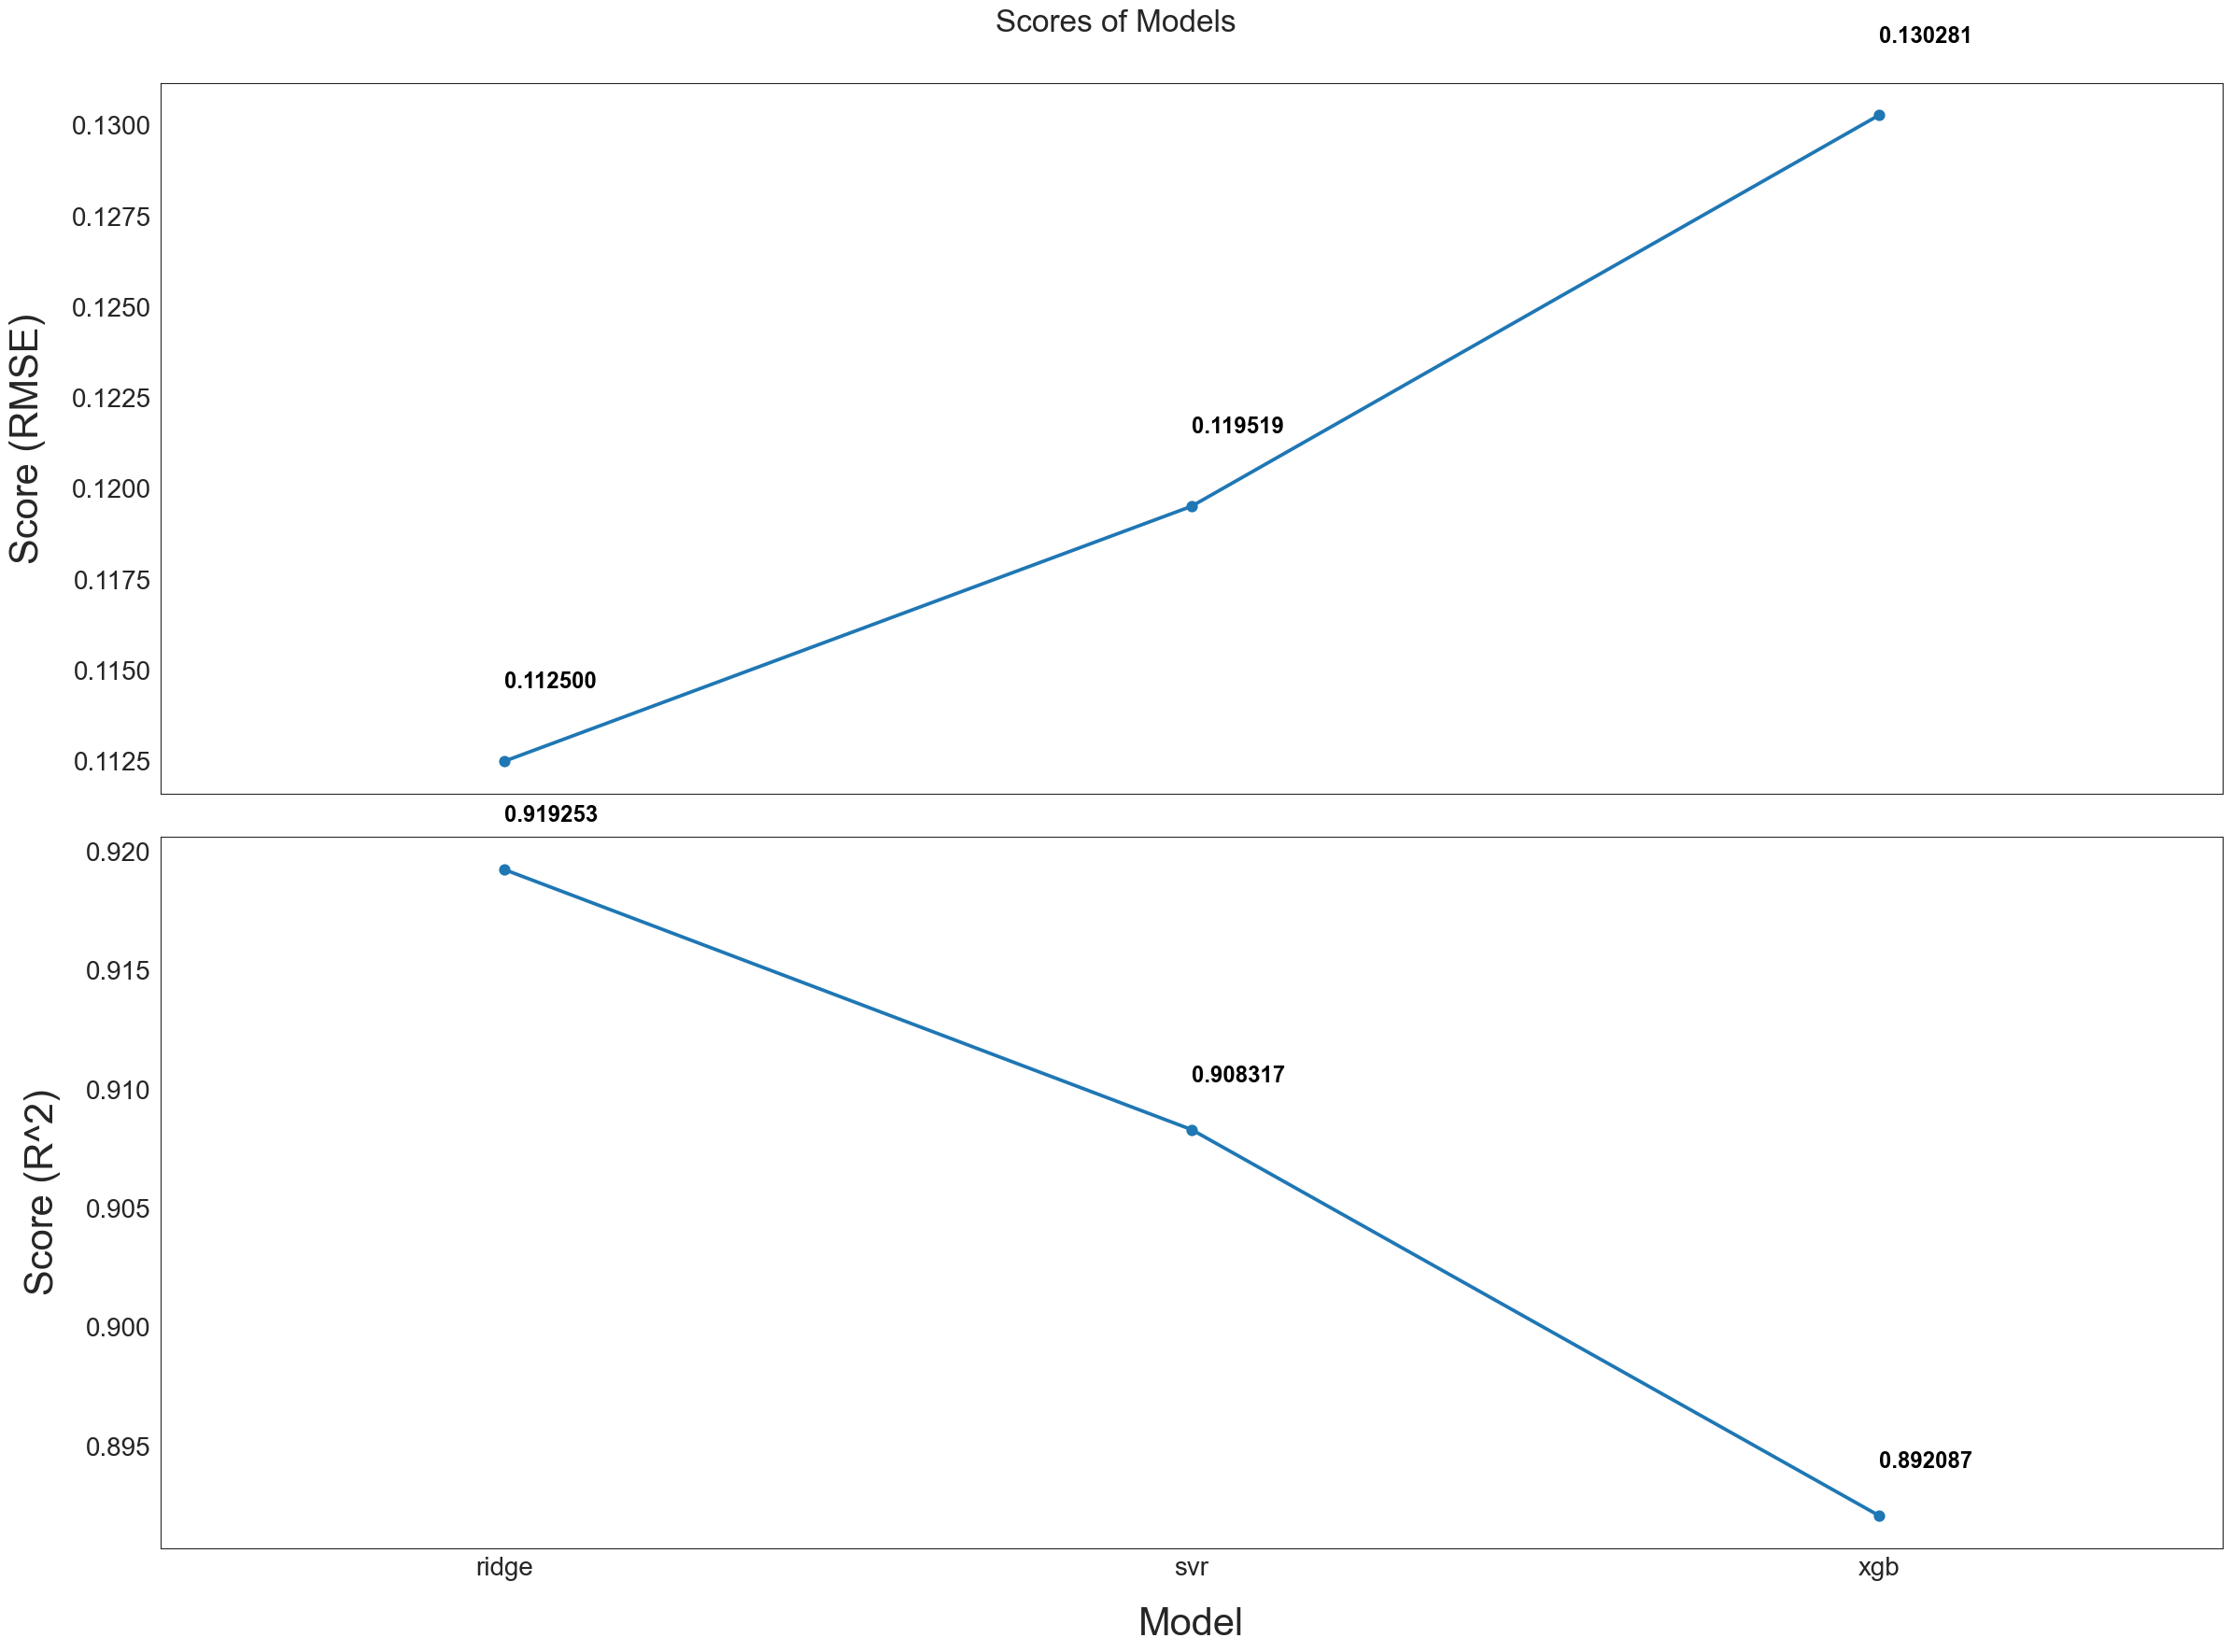

In [72]:
# Plot the predictions for each model
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18), sharex=True)

# Extract model names and scores for RMSE
model_names_rmse = list(scores_rmse.keys())
scores_rmse_values = [score_rmse[0].mean() for score_rmse in scores_rmse.values()]  # Mean of KFold scores as an example

# Plot RMSE scores
sns.pointplot(x=model_names_rmse, y=scores_rmse_values, ax=ax1)
for i, score_rmse in enumerate(scores_rmse.values()):
    ax1.text(i, score_rmse[0].mean() + 0.002, '{:.6f}'.format(score_rmse[0].mean()), horizontalalignment='left', size='xx-large', color='black', weight='semibold')

ax1.set_ylabel('Score (RMSE)', size=30, labelpad=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Extract model names and scores for R^2
model_names_r2 = list(scores_r2.keys())
scores_r2_values = [score_r2[0].mean() for score_r2 in scores_r2.values()]  # Mean of KFold scores as an example

# Plot R^2 scores
sns.pointplot(x=model_names_r2, y=scores_r2_values, ax=ax2)
for i, score_r2 in enumerate(scores_r2.values()):
    ax2.text(i, score_r2[0].mean() + 0.002, '{:.6f}'.format(score_r2[0].mean()), horizontalalignment='left', size='xx-large', color='black', weight='semibold')

ax2.set_ylabel('Score (R^2)', size=30, labelpad=20)
ax2.set_xlabel('Model', size=30, labelpad=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Title and show plot
plt.suptitle('Scores of Models', size=24)
plt.tight_layout()
plt.show()

In [73]:
# Make prediction using test set
predictions = ridge_model_full_data.predict(X_test)

# Print or use predictions as needed
print(predictions)

[12.36191025 11.4824672  11.56895022 12.00599271 12.69315938 11.90830374
 12.43271289 12.66544676 12.5861027  11.87423579 11.96725999 12.13381373
 12.05847651 12.60524657 12.01571825 12.07890166 12.17313507 11.74780593
 11.74503339 12.28060599 12.16883578 12.20515578 12.05114687 12.27602378
 12.17601098 11.97530375 12.16187342 11.6402348  12.10056954 11.95565355
 11.78010179 11.64210328 12.12708247 11.69896623 12.491821   12.59224087
 11.80481548 12.2334104  11.60923443 11.53343857 11.73227396 12.34254239
 11.66827152 11.62689757 11.73046444 12.02831976 11.68291847 11.77554412
 11.85283719 11.90461536 11.78453883 11.22392739 11.58948154 11.82443329
 11.95401334 12.3916503  12.24279236 11.96592882 11.77174299 10.6593902
 11.14099911 12.17923865 12.57844304 12.48613047 12.6409418  12.28257877
 11.62014465 11.13398887 11.77414142 12.03218103 12.68583014 11.83445264
 11.62714116 11.9909162  12.16141874 12.1711748  12.41999165 12.03485718
 11.88412859 11.71324897 11.64921444 11.13205636 11.

In [74]:
comparison_df = pd.DataFrame({'Actual': train_labels_test, 'Predicted': predictions})
print(comparison_df.head(10))  # Display first 10 rows for comparison

         Actual  Predicted
1320  12.154785  12.361910
836   11.512935  11.482467
413   11.652696  11.568950
522   11.976666  12.005993
1035  12.661917  12.693159
614   11.831386  11.908304
218   12.649158  12.432713
1031  12.644331  12.665447
1288  12.546114  12.586103
886   11.816734  11.874236


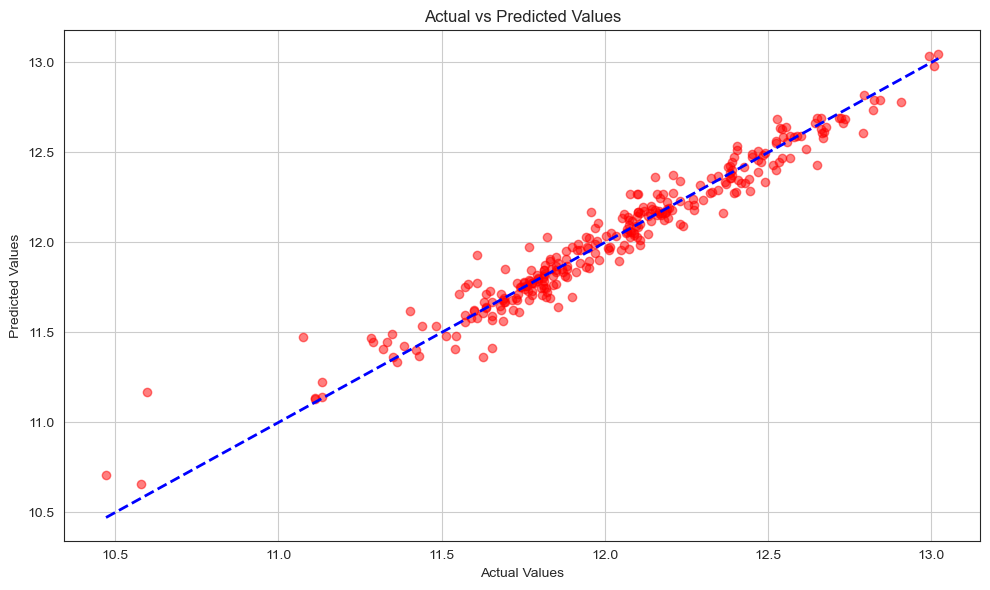

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], color='red', alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         color='blue', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
gc.collect()

62329

## STEP 8: MAKING PREDICTION USING TEST DATASET

In [77]:
# Insert the new features into the dataset
house_test = all_features_encoded.iloc[:len(train_labels), :]
house_test.shape

(1458, 379)

In [80]:
# Replace X_test with your actual test data
predictions_test = ridge_model_full_data.predict(house_test)

# Print or use predictions as needed
print(predictions_test)

[12.22606398 12.1928468  12.28013992 ... 12.4816634  11.87374969
 11.93091692]


In [81]:
gc.collect()

0